In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable

In [78]:
df = pd.read_csv('grades_Tarea3.csv')
df

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


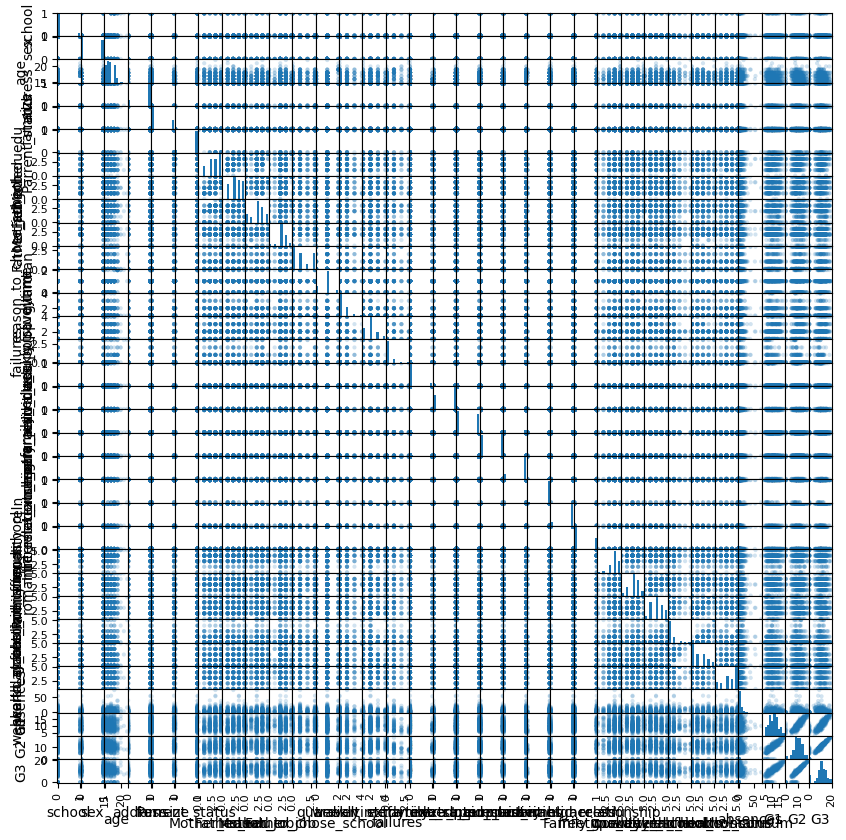

In [76]:
#se demora en ejecutar
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

## Variable objetivo

In [79]:
x = df.drop(columns=['G3'])
y = df['G3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=254)

In [80]:
#sin regulador
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse_sin_regulador = mean_squared_error(y_test, y_pred)
r2_sin_regulador = r2_score(y_test, y_pred)
print(f'MSE: {mse_sin_regulador}')
print(f'R2: {r2_sin_regulador}')

MSE: 4.932035574692813
R2: 0.7524064187447084


In [81]:
#regulador Lasso
l1 = Lasso()
l1.fit(x_train, y_train)
y_pred_l1 = l1.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_l1)}')
print(f'R2: {r2_score(y_test, y_pred_l1)}')

MSE: 5.041794070292545
R2: 0.7468964221951755


In [82]:
#regulador Ridge
l2 = Ridge()
l2.fit(x_train, y_train)
y_pred_l2 = l2.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_l2)}')
print(f'R2: {r2_score(y_test, y_pred_l2)}')

MSE: 4.928917048539452
R2: 0.7525629721691223


In [83]:
#regulador ElasticNet
l3 = ElasticNet()
l3.fit(x_train, y_train)
y_pred_l3 = l3.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_l3)}')
print(f'R2: {r2_score(y_test, y_pred_l3)}')

MSE: 5.026662207238316
R2: 0.7476560582740159


## Optimización

In [84]:
l1_optimizer = GridSearchCV(l1, {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2')
l1_optimizer.fit(x_train, y_train)
print(f'Best l1: {l1_optimizer.best_params_}')
l2_optimizer = GridSearchCV(l2, {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2')
l2_optimizer.fit(x_train, y_train)
print(f'Best l2: {l2_optimizer.best_params_}')
l3_optimizer = GridSearchCV(l3, {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2')
l3_optimizer.fit(x_train, y_train)
print(f'Best l3: {l3_optimizer.best_params_}')

Best l1: {'alpha': 1}
Best l2: {'alpha': 10}
Best l3: {'alpha': 1}


In [86]:
# Valores optimizados de l1
l1_opt = Lasso(l1_optimizer.best_params_['alpha'])
l1_opt.fit(x_train, y_train)
y_pred_l1 = l1_opt.predict(x_test)
mse_optimizado_l1 = mean_squared_error(y_test, y_pred_l1)
r2_optimizado_l1 = r2_score(y_test, y_pred_l1)
print('Valores optimizados de l1:')
print(f'MSE: {mse_optimizado_l1}')
print(f'R2: {r2_optimizado_l1}')

Valores optimizados de l1:
MSE: 5.041794070292545
R2: 0.7468964221951755


In [87]:
ec = ''
for coeficiente, predictor in zip(l1_opt.coef_, x.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_l1 = f'l1_y_hat = {l1_opt.intercept_:.3f} +{ec}'
modelo_ajustado_l1

'l1_y_hat = -0.912 + 0.000*school + 0.000*sex + 0.000*age + 0.000*address + 0.000*famsize + 0.000*Parrent_status + 0.000*Mother_edu + 0.000*Father_edu + 0.000*Mother_job + 0.000*Father_job + 0.000*reason_to_chose_school + 0.000*guardian + 0.000*traveltime + 0.000*weekly_studytime + 0.000*failures + 0.000*extra_edu_supp + 0.000*family_edu_supp + 0.000*extra_paid_class + 0.000*extra_curr_activities + 0.000*nursery + 0.000*Interested_in_higher_edu + 0.000*internet_access + 0.000*romantic_relationship + 0.000*Family_quality_reln + 0.000*freetime_after_school + 0.000*goout_with_friends + 0.000*workday_alcohol_consum + 0.000*weekend_alcohol_consum + 0.000*health_status + 0.024*absences + 0.072*G1 + 0.974*G2 +'

In [88]:
l2_opt = Ridge(l2_optimizer.best_params_['alpha'])
l2_opt.fit(x_train, y_train)
y_pred_l2 = l2_opt.predict(x_test)
mse_optimizado_l2 = mean_squared_error(y_test, y_pred_l2)
r2_optimizado_l2 = r2_score(y_test, y_pred_l2)
print('Valores optimizados de l2:')
print(f'MSE: {mse_optimizado_l2}')
print(f'R2: {r2_optimizado_l2}')

Valores optimizados de l2:
MSE: 4.912375949923995
R2: 0.753393353414771


In [89]:
ec = ''
for coeficiente, predictor in zip(l2_opt.coef_, x.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_l2 = f'l2_y_hat = {l2_opt.intercept_:.3f} +{ec}'
modelo_ajustado_l2

'l2_y_hat = -1.644 + 0.368*school + 0.087*sex + 0.139*age + 0.047*address + 0.034*famsize + 0.013*Parrent_status + 0.137*Mother_edu + 0.129*Father_edu + 0.104*Mother_job + 0.079*Father_job + 0.072*reason_to_chose_school + 0.128*guardian + 0.206*traveltime + 0.101*weekly_studytime + 0.221*failures + 0.228*extra_edu_supp + 0.173*family_edu_supp + 0.116*extra_paid_class + 0.147*extra_curr_activities + 0.029*nursery + 0.147*Interested_in_higher_edu + 0.199*internet_access + 0.341*romantic_relationship + 0.282*Family_quality_reln + 0.110*freetime_after_school + 0.067*goout_with_friends + 0.121*workday_alcohol_consum + 0.075*weekend_alcohol_consum + 0.083*health_status + 0.056*absences + 0.175*G1 + 0.955*G2 +'

In [90]:
l3_opt = ElasticNet(l3_optimizer.best_params_['alpha'])
l3_opt.fit(x_train, y_train)
y_pred_l3 = l3_opt.predict(x_test)
mse_optimizado_l3 = mean_squared_error(y_test, y_pred_l3)
r2_optimizado_l3 = r2_score(y_test, y_pred_l3)
print('Valores optimizados de l2:')
print(f'MSE: {mse_optimizado_l3}')
print(f'R2: {r2_optimizado_l3}')

Valores optimizados de l2:
MSE: 5.026662207238316
R2: 0.7476560582740159


In [91]:
ec = ''
for coeficiente, predictor in zip(l3_opt.coef_, x.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_l3 = f'l3_y_hat = {l3_opt.intercept_:.3f} +{ec}'
modelo_ajustado_l3

'l3_y_hat = -1.367 + 0.000*school + 0.000*sex + 0.000*age + 0.000*address + 0.000*famsize + 0.000*Parrent_status + 0.000*Mother_edu + 0.000*Father_edu + 0.000*Mother_job + 0.000*Father_job + 0.000*reason_to_chose_school + 0.000*guardian + 0.000*traveltime + 0.000*weekly_studytime + 0.000*failures + 0.000*extra_edu_supp + 0.000*family_edu_supp + 0.000*extra_paid_class + 0.000*extra_curr_activities + 0.000*nursery + 0.000*Interested_in_higher_edu + 0.000*internet_access + 0.000*romantic_relationship + 0.000*Family_quality_reln + 0.000*freetime_after_school + 0.000*goout_with_friends + 0.000*workday_alcohol_consum + 0.000*weekend_alcohol_consum + 0.000*health_status + 0.034*absences + 0.191*G1 + 0.890*G2 +'

## Comparacion de modelos

In [94]:
table = PrettyTable()
table.field_names = ["Modelo", "MSE", "R2"]
table.add_row(["Sin regulador", mse_sin_regulador, r2_sin_regulador])
table.add_row(["Lasso", mse_optimizado_l1, r2_optimizado_l1])
table.add_row(["Ridge", mse_optimizado_l2, r2_optimizado_l2])
table.add_row(["ElasticNet", mse_optimizado_l3, r2_optimizado_l3])
table

Modelo,MSE,R2
Sin regulador,4.932035574692813,0.7524064187447084
Lasso,5.041794070292545,0.7468964221951755
Ridge,4.912375949923995,0.753393353414771
ElasticNet,5.026662207238316,0.7476560582740159
